# Simple causal models

Here, we showcase how to generate data for the simple case, in which we solve single separate dynamical systems such as the `Lorenz` system. The ODE systems are integrated using the `dysts` package. 

Let's start by solving a single Lorenz system for 1000 time-steps. 

In [1]:
from causaldynamics.systems import solve_system

data = solve_system(num_timesteps=1000, num_systems=1, system_name='Lorenz')
data.shape # [num_timesteps, num_systems, node_dim]

torch.Size([1000, 1, 3])

Let's visualize the result using the xarray package.

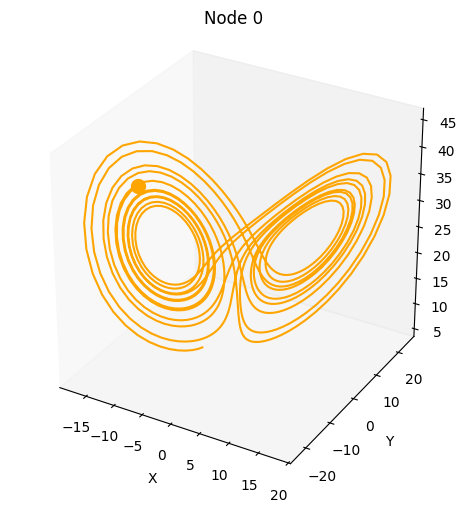

In [2]:
import xarray as xr
import matplotlib.pyplot as plt

from causaldynamics.plot import plot_3d_trajectories

da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)
plt.show()

We can also solve a randomly selected dynamical system.

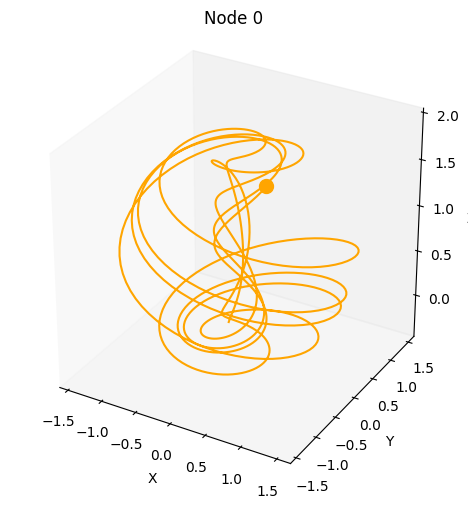

In [3]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_systems=1)
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)
plt.show()

We can also provide kwargs to the underlying `dysts.make_trajectory` function, e.g. add noise.

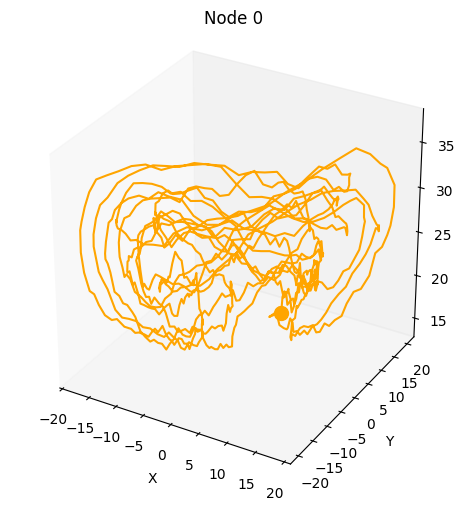

In [4]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_systems=1, make_trajectory_kwargs={'noise': 0.5})
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)
plt.show()

Also, by increasing `num_systems` we can compute multiple uncoupled dynamical system trajectories in parallel using the same command.

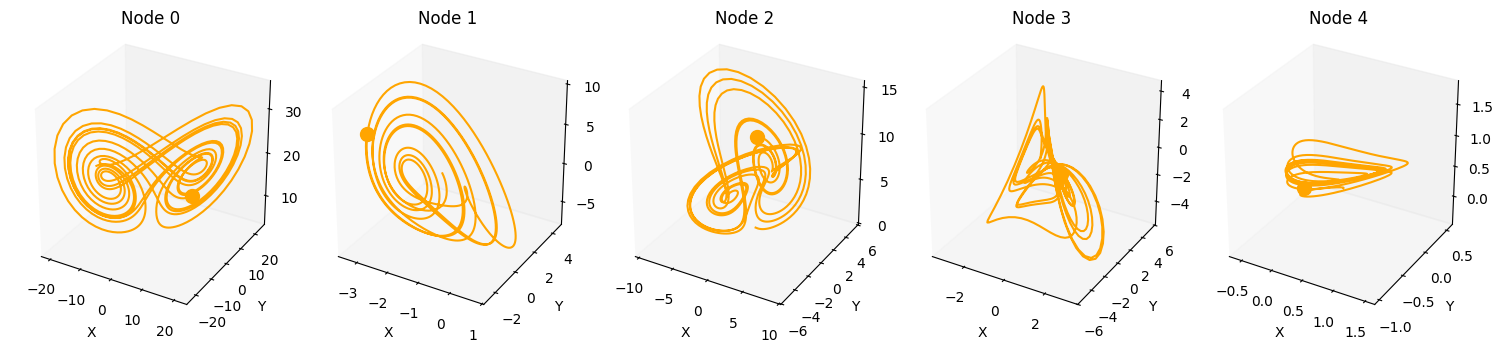

In [5]:
from causaldynamics.systems import solve_random_systems

data = solve_random_systems(num_timesteps=1000, num_systems=5)
da = xr.DataArray(data, dims=['time', 'node', 'dim'])
plot_3d_trajectories(da)
plt.show()